# Generate Kaplan Meier Curves 

### Install Necessary Plotting Library
To plot kaplan meier curves the _lifelines_ library is required 

In [1]:
!pip install lifelines -q

In [2]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
from utils.Analysis import Analysis
from utils.Database import Database

## Find prostate cancer patients
Use the Database Class to find mrns for prostate cancer patients

In [14]:
d = Database()

Connect To Database


encryption key: ········


Connected: {'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,public', 'sslmode': 'require', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'}


## Get list of projects and their UUID

In [28]:
d.fetch_projects()

,name,description,uuid
0,Prostate Cancer,Assessing biochemical failure,ea0500f9-75ee-4587-b3da-04e3341c6549
1,Prostate Cancer test,Assessing biochemical failure,02bae428-4312-4f97-8488-bf511fd2d44e


### Set Project UUID

In [16]:
d.set_project_uuid('02bae428-4312-4f97-8488-bf511fd2d44e')

project_uuid: 02bae428-4312-4f97-8488-bf511fd2d44e


In [23]:
patient_filter=[{'tag':'diagnosis', 'attribute': 'diagnosis', 'value': ['c61 - Malignant neoplasm of prostate']},]

print(f"{patient_filter=}")
mrns = d.get_mrns_where_filters(patient_filter)
print(f"mrns:{mrns}")


patient_filter=[{'tag': 'diagnosis', 'attribute': 'diagnosis', 'value': ['c61 - Malignant neoplasm of prostate']}, {'icd10': 'c61', 'tag': 'pT', 'attribute': 'pT', 'value': ['T3a', 'T3b']}]
mrns:['333333', '666666']


In [ ]:
# Delete Database Connection
del d

### Create an instance of the Analysis class

In [24]:
a = Analysis()

Connect To Database


encryption key: ········


Connected: {'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,public', 'sslmode': 'require', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'}


## Define start and event
What tag defines the start time (eg. surgery, radiation)
What tag defines an event (eg. death, biochemical_progression)

In [25]:
icd10 = 'c61'
start_tag = 'surgery'
event_tag = 'biochemical-progression'

### Use the method _kaplan_meier_ to get kaplan meier data

In [26]:
output = a.kaplan_meier(mrns, icd10, start_tag, event_tag)
output

{'mrns': ['333333', '666666'], 'durations': [1130, 530], 'events': [1, 1]}

### Plot The Kaplan Meier Curve

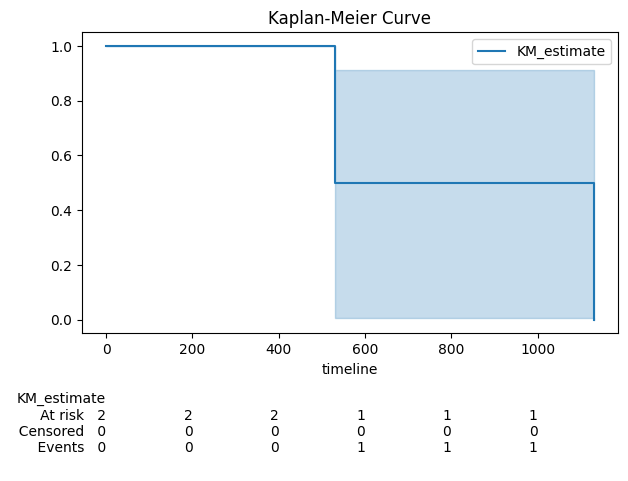

In [27]:
# Extract Data
mrns = output['mrns']
durations = output['durations']
events = output['events']

# Generate Kaplan Meier
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=events)
kmf.plot_survival_function(at_risk_counts=True)
plt.title('Kaplan-Meier Curve')
plt.show()
plt.close()

In [ ]:
del a